#### Types Of Transformation

1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
   * Logarithmic Transformation
   * Reciprocal Trnasformation
   * Square Root Transformation
   * Exponential Trnasformation
   * Box Cox Transformation

##### Standardization

We try to bring all the variables or features to a similar scale. 

Standarisation means centering the variable at zero.

z=(x-x_mean)/std

In [4248]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()


,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4249]:
df.describe()#here the fare min 0,max 512 //we need to scale down it bcz the min and max values is higher

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [4250]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [4251]:
#df["Age"].median()

In [4252]:
#df["age.median"]=df["Age"].median()

In [4253]:
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [4254]:
#imputation
df['Age'].fillna(df.Age.median(),inplace=True)

In [4255]:
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


In [4256]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [4257]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [4258]:
### Fit vs fit_transform
df_scaled=sc.fit_transform(df)#it scaled down entire df

In [4259]:
df_scaled #numpy array 

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [4260]:
updates_df=pd.DataFrame(df_scaled)#convert it into a dataframe

In [4261]:
updates_df.describe()# ml learning time will be very less

,0,1,2,3
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.287732e-16,-2.031048e-16,3.841546e-16,-4.373606e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-7.892723e-01,-1.566107e+00,-2.224156e+00,-6.484217e-01
25%,-7.892723e-01,-3.693648e-01,-5.657365e-01,-4.891482e-01
50%,-7.892723e-01,8.273772e-01,-1.046374e-01,-3.573909e-01
75%,1.266990e+00,8.273772e-01,4.333115e-01,-2.424635e-02
max,1.266990e+00,8.273772e-01,3.891554e+00,9.667167e+00


In [4262]:
import matplotlib.pyplot as plt


(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.32675851, -1.08741009, -0.84806167, -0.60871326,
        -0.36936484, -0.13001642,  0.10933199,  0.34868041,  0.58802883,
         0.82737724]),
 <BarContainer object of 10 artists>)

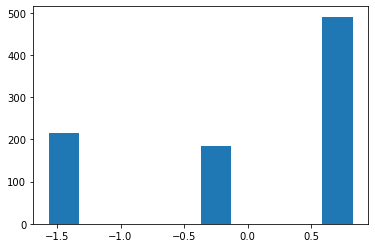

In [4263]:
plt.hist(updates_df[1])
# all rows and 1 colum

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-2.22415608, -1.61258503, -1.00101397, -0.38944292,  0.22212813,
         0.83369919,  1.44527024,  2.05684129,  2.66841235,  3.2799834 ,
         3.89155445]),
 <BarContainer object of 10 artists>)

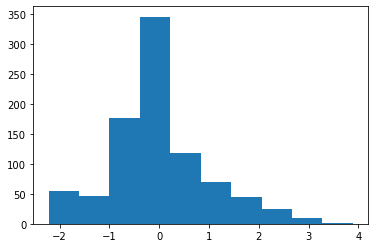

In [4264]:
plt.hist(updates_df[2])# we replace with median (null values)

In [4265]:
df["Pclass"].unique()

array([3, 1, 2])

(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.44210989, -0.23579813, -0.02948636,  0.1768254 ,
         0.38313716,  0.58944893,  0.79576069,  1.00207246,  1.20838422,
         1.41469598,  1.62100775,  1.82731951,  2.03363127,  2.23994304,
         2.4462548 ,  2.65256656,  2.85887833,  3.06519009,  3.27150185,
         3.47781362,  3.68412538,  3.89043715,  4.09674891,  4.30306067,
         4.50937244,  4.7156842 ,  4.92199596,  5.12830773,  5.33461949,
         5.54093125,  5.74724302,  5.95355478,  6.15986654,  6.36617831,
         6.57249007,  6.77880184,  6.9851136 ,  7.19142536,  7.39773713,
         7.60404889,  7.81036065,  8.01667242,  8.22298418,  8.42929594,
 

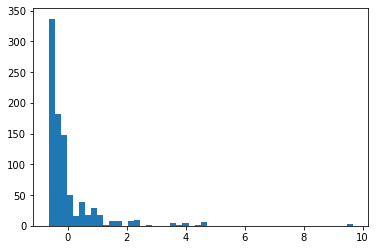

In [4266]:
plt.hist(updates_df[3],bins=50)
#right  skewed

In [4267]:
from sklearn.preprocessing import MinMaxScaler

In [4268]:
#minmax
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
df_minmax=pd.DataFrame(ms.fit_transform(df),columns=df.columns)
df_minmax

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

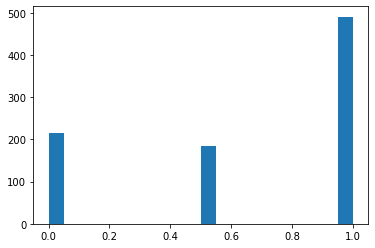

In [4269]:
plt.hist(df_minmax["Pclass"],bins=20)

In [4270]:
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

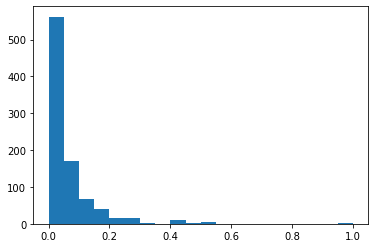

In [4271]:
plt.hist(df_minmax["Fare"],bins=20)

##### Robust Scaler
It is used to scale the feature to median and quantiles.

Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

In [4272]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
df_robust=pd.DataFrame(rs.fit_transform(df),columns=df.columns)
df_robust

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

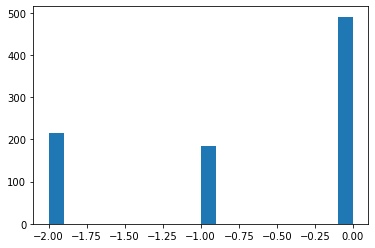

In [4273]:
plt.hist(df_robust["Pclass"],bins=20)

In [4274]:
df_robust.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,-0.691358,0.104737,0.768745
std,0.486592,0.836071,1.001515,2.152200
min,0.000000,-2.000000,-2.121538,-0.626005
25%,0.000000,-1.000000,-0.461538,-0.283409
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.538462,0.716591
max,1.000000,0.000000,4.000000,21.562738


In [4275]:
df_robust.Fare.mean()

0.7687447148748641

In [4276]:
df_robust.Fare.median()

0.0

In [4277]:
df_robust.Fare.mode()

0   -0.277363
dtype: float64

In [4278]:
dat=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
dat.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4279]:
dat.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4280]:
dat['Age']=dat['Age'].fillna(dat['Age'].median())

In [4281]:
dat.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [4282]:
import scipy.stats as stat
import pylab

In [4283]:
def plot_data(dat,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)#1st row 2 colunm,1st columns
    dat[feature].hist()
    plt.subplot(1,2,2)#1st row 2 colunm,2nd columns
    stat.probplot(df[feature],dist='norm',plot=pylab)#dist=distribution
    plt.show()
    

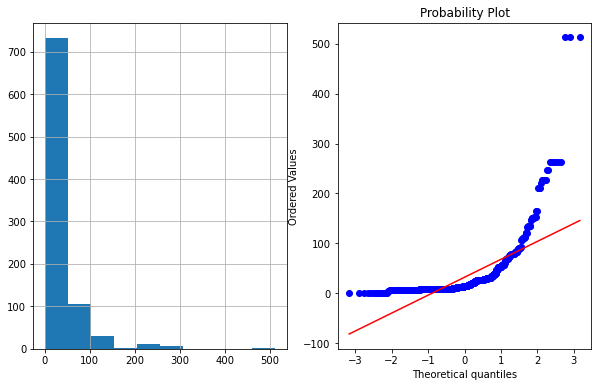

In [4284]:
plot_data(dat,"Fare")

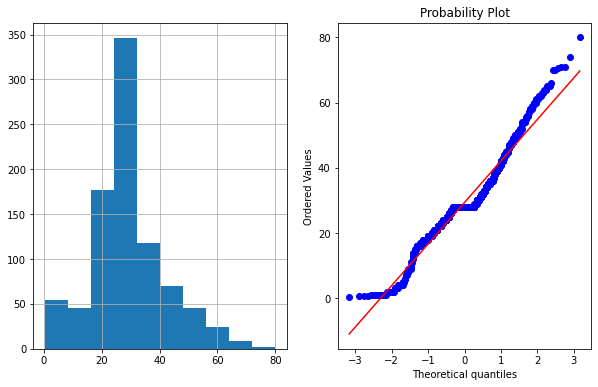

In [4285]:
plot_data(dat,"Age")

Logarithmic transformations are used to "normalize" skewed or kurtotic distributions of continuous variables so that parametric statistics can be conducted.

we should not use scale down data

In [4286]:
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()
import numpy as np# why we call numpy// because we store mathethatical imputation
df['Age_log']=np.log(df['Age'])

In [4287]:
df['Age_log']

0      3.091042
1      3.637586
2      3.258097
3      3.555348
4      3.555348
         ...   
886    3.295837
887    2.944439
888         NaN
889    3.258097
890    3.465736
Name: Age_log, Length: 891, dtype: float64

In [4288]:
df

,Survived,Pclass,Age,Fare,Age_log
0,0,3,22.0,7.2500,3.091042
1,1,1,38.0,71.2833,3.637586
2,1,3,26.0,7.9250,3.258097
3,1,1,35.0,53.1000,3.555348
4,0,3,35.0,8.0500,3.555348
...,...,...,...,...,...
886,0,2,27.0,13.0000,3.295837
887,1,1,19.0,30.0000,2.944439
888,0,3,NaN,23.4500,NaN
889,1,1,26.0,30.0000,3.258097


In [4289]:
df["Age"].fillna(df.Age.median(),inplace=True)
df.isnull().sum()
df["Age_log"].fillna(df.Age_log.median(),inplace=True)

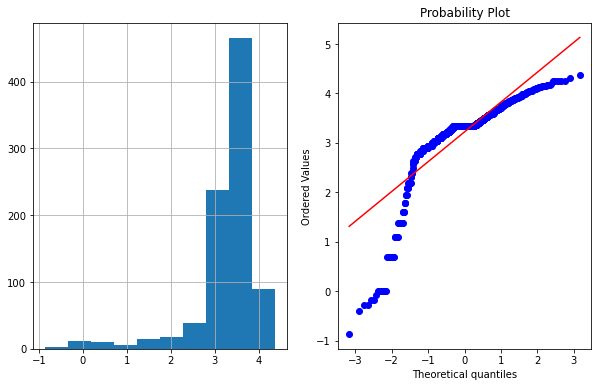

In [4290]:
plot_data(df,"Age_log")

In [4291]:
df['Fare_log']=np.log1p(df['Fare'])# when there is -ve values in the fare columns
#plot_data(df,'Fare_log')

In [4292]:
df['Fare_log']

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Fare_log, Length: 891, dtype: float64

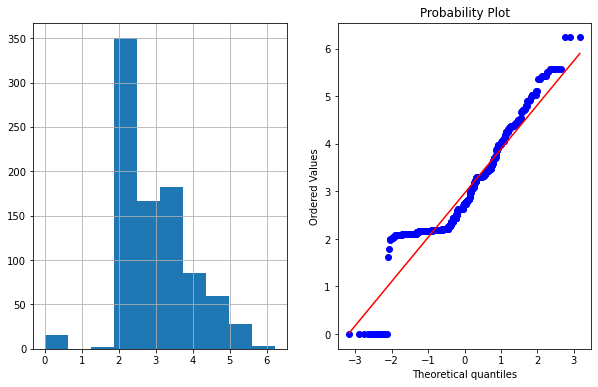

In [4293]:
plot_data(df,'Fare_log')

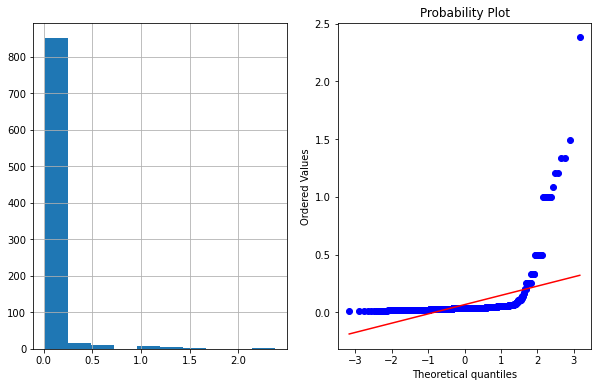

In [4294]:

df["Age_rec"]=1/df.Age
plot_data(df,"Age_rec",)

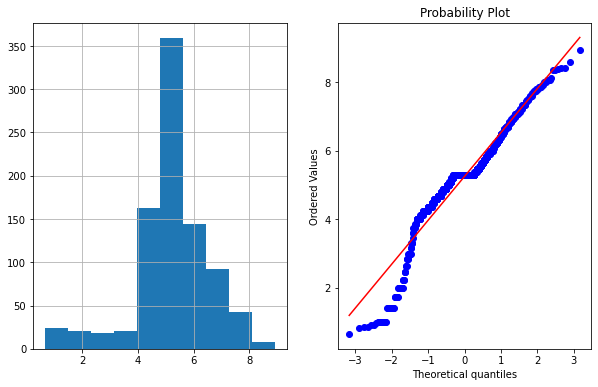

In [4295]:
##### Square Root Transformation
df["sq_root"]=df.Age**(1/2)
plot_data(df,"sq_root")

In [ ]:
#### Exponential Transformation
